# MAS DSE 200: Homework 3 - Matplotlib

#### Tasks:

- Introduction to Matplotlib.  
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 3"

#### Due date: Thursday, November 6, 2025, 11:59 PM

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

matplotlib - https://matplotlib.org/stable/contents.html

seaborn - https://seaborn.pydata.org/api.html

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission.
* To obtain full marks for a question, both the answer and the code should be correct.
* Completely wrong (or missing) code with correct answer will result in zero marks.

### Imports

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import random
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Preliminaries

Load the cars data into a Pandas DataFrame called cars_df.

In [51]:
thePath = "./"
theFile = 'cars.csv'
theLink = "https://dse200.dev/Day3/cars.csv"

if not os.path.exists(thePath + theFile):
    r = requests.get(theLink)
    with open(thePath + theFile, 'wb') as f:
        f.write(r.content)

cars_df = pd.read_csv('cars.csv')

In [52]:
len(cars_df)

5076

In [53]:
cars_df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


### 1. Inspect data - 1 point

1.1 What is the number of unique car identifiers (`Identification.ID`)? - 0.5 points

In [54]:
unique_ids = len(cars_df['Identification.ID'].unique())
print(unique_ids)

5030


1.2 What is the number of unique entries in the dataset when jointly looking at `Identification.ID` AND `Identification.Year`? Note that this should be greater than the value obtained before - 0.5 points

In [55]:
unique_ids_and_years = len(cars_df.groupby(['Identification.ID', 'Identification.Year']))
print(unique_ids_and_years)

5039


In [56]:
assert unique_ids_and_years > unique_ids

### 2. Distribution of data - 3 points
a) Plot a distribution(histogram) of Highway fuel economy(`Fuel Information.Highway mpg`). Overlay this plot with a density plot of the same quantity - 2 points

Note:
1. Each value must have its own bin (Hint - use `range`) and should occupy the entire width of the plot
2. Each bar of the histogram should be blue and separated by black border(Hint - look at `ec` parameter of matplotlib's histogram API)
3. The overlaying density line should be orange

In [57]:
from scipy.stats import gaussian_kde


In [58]:
max_hwy_mpg = cars_df['Fuel Information.Highway mpg'].max()
min_hwy_mpg = cars_df['Fuel Information.Highway mpg'].min()
print("Max hwy mpg:",max_hwy_mpg)
print("Min hwy mpg:",min_hwy_mpg)





Max hwy mpg: 223
Min hwy mpg: 11


In [59]:
#clean up na
cars_mpg = pd.to_numeric(cars_df['Fuel Information.Highway mpg'], errors='coerce').dropna()

#Define bin values in steps of 10 between 11 and 223
bins = np.arange(11, 224, 10)

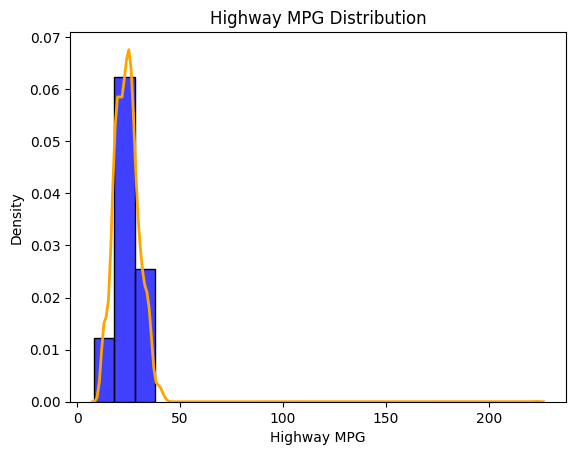

In [70]:
sns.histplot(cars_mpg, bins=bins, color='blue', ec='black', stat='density')
sns.kdeplot(cars_mpg, color='orange', linewidth=2)

plt.title('Highway MPG Distribution')
plt.xlabel('Highway MPG')
plt.ylabel('Density')
plt.show()

b) Repeate the same for city fuel economy(`Fuel Information.City mpg`) - 0.5 point

(Subjective)(Optional) Is this plot similar to the previous one? Approximately, how much is city fuel economy lower compared to highway fuel economy?

In [71]:
max_city_mpg = cars_df['Fuel Information.City mpg'].max()
min_city_mpg = cars_df['Fuel Information.City mpg'].min()
print("Max city mpg:",max_city_mpg)
print("Min city mpg:",min_city_mpg)


Max city mpg: 38
Min city mpg: 8


In [72]:
#clean up na
cars_city_mpg = pd.to_numeric(cars_df['Fuel Information.City mpg'], errors='coerce').dropna()

#Define bin values in steps of 10 between 11 and 223
bins = np.arange(min_city_mpg, max_city_mpg+1, 10)

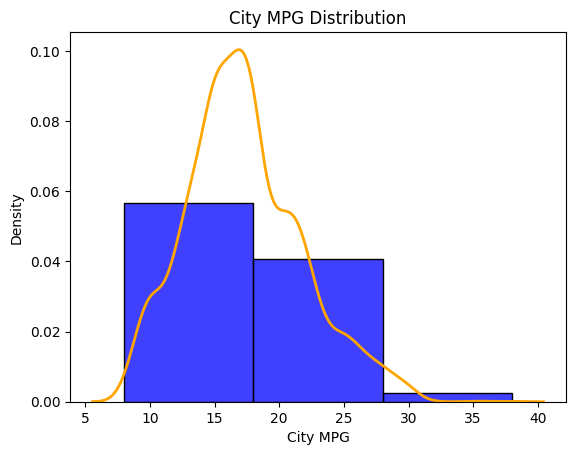

In [73]:
sns.histplot(cars_city_mpg, bins=bins, color='blue', ec='black', stat='density')
sns.kdeplot(cars_city_mpg, color='orange', linewidth=2)

plt.title('City MPG Distribution')
plt.xlabel('City MPG')
plt.ylabel('Density')
plt.show()

c) Repeat the same for Engine Horsepower(`Engine Information.Engine Statistics.Horsepower`) - 0.5 points

Note:

1. Use appropriate `bins`, since the range of horsepower is much higher than fuel economy. Hint - Try bin size of `10` or `20`
2. Experiment with different colors from 1 (a)


In [74]:
max_hp = cars_df['Engine Information.Engine Statistics.Horsepower'].max()
min_hp = cars_df['Engine Information.Engine Statistics.Horsepower'].min()
print("Max city mpg:",max_hp)
print("Min city mpg:",min_hp)

Max city mpg: 638
Min city mpg: 100


In [80]:
#clean up na
cars_hp = pd.to_numeric(cars_df['Engine Information.Engine Statistics.Horsepower'], errors='coerce').dropna()

#Define bin values in steps of 20 between 11 and 223
bins = np.arange(min_hp, max_hp+1, 20)

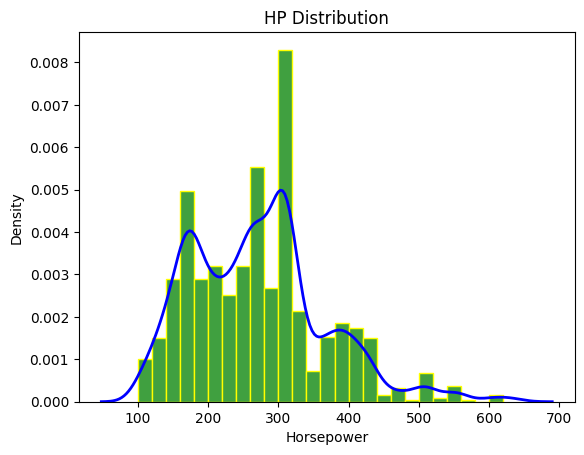

In [81]:
sns.histplot(cars_hp, bins=bins, color='green', ec='yellow', stat='density')
sns.kdeplot(cars_hp, color='blue', linewidth=2)

plt.title('HP Distribution')
plt.xlabel('Horsepower')
plt.ylabel('Density')
plt.show()

### 3. Correlation - 3 points

3.1 Plot a scatter plot, overlayed with a *line of best fit* plot, of engine horsepower vs highway fuel economy - 2 point

* The x-axis is engine power
* The y-axis is fuel economy
* Lable the axes appropriately
* Add an appropriate title
* Use [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) or any other method/library to plot the line of best fit

* Hint - The resulting plot should look similar to [this](https://en.wikipedia.org/wiki/Simple_linear_regression#/media/File:Okuns_law_quarterly_differences.svg)

Reference  -[`Simple linear regression`](https://en.wikipedia.org/wiki/Simple_linear_regression)

You do not have to worry about the details of linear regression here. You can use any library function to do it for you

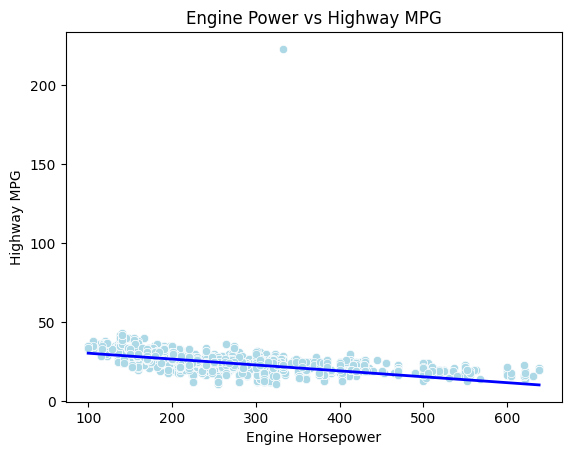

In [93]:
# Clean numeric data
x = pd.to_numeric(cars_df['Engine Information.Engine Statistics.Horsepower'])
y = pd.to_numeric(cars_df['Fuel Information.Highway mpg'])

# Fit 1st-degree polynomial
z=np.polyfit(x, y, 1)
p = np.poly1d(z)


# Create smooth line values
x_line = np.linspace(x.min(), x.max(), 200)
y_line = p(x_line)

#Plot scatterplot
sns.scatterplot(data=cars_df, x='Engine Information.Engine Statistics.Horsepower', y='Fuel Information.Highway mpg', color='lightblue')

# Plot best-fit line
plt.plot(x_line, y_line, color='blue', linewidth=2)

plt.title('Engine Power vs Highway MPG')
plt.xlabel('Engine Horsepower')
plt.ylabel('Highway MPG')
plt.show()

3.2 You might notice in the previous plot that there is an outlier(porbably an error) in fuel economy. Repate the plot after removing the outlier point - 0.5 points

(Optional)(Subjective) What can you tell about the correlation between engine horsepower and fuel economy?

In [95]:
cars_df[['Fuel Information.Highway mpg']].describe()


,Fuel Information.Highway mpg
count,5076.000000
mean,24.125493
std,6.488293
min,11.000000
25%,20.000000
50%,24.000000
75%,28.000000
max,223.000000


In [99]:
#remove the outlier
cars_df = cars_df[cars_df['Fuel Information.Highway mpg'] != 223]
#verify
cars_df[['Fuel Information.Highway mpg']].describe()


,Fuel Information.Highway mpg
count,5075.000000
mean,24.086305
std,5.857461
min,11.000000
25%,20.000000
50%,24.000000
75%,28.000000
max,43.000000


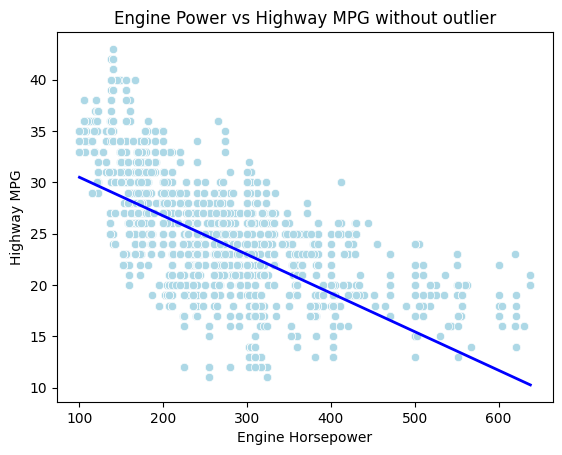

In [100]:
# Clean numeric data
x = pd.to_numeric(cars_df['Engine Information.Engine Statistics.Horsepower'])
y = pd.to_numeric(cars_df['Fuel Information.Highway mpg'])

# Fit 1st-degree polynomial
z=np.polyfit(x, y, 1)
p = np.poly1d(z)


# Create smooth line values
x_line = np.linspace(x.min(), x.max(), 200)
y_line = p(x_line)

#Plot scatterplot
sns.scatterplot(data=cars_df, x='Engine Information.Engine Statistics.Horsepower', y='Fuel Information.Highway mpg', color='lightblue')

# Plot best-fit line
plt.plot(x_line, y_line, color='blue', linewidth=2)

plt.title('Engine Power vs Highway MPG without outlier')
plt.xlabel('Engine Horsepower')
plt.ylabel('Highway MPG')
plt.show()

3.3 Repeat the same for engine horsepower(x-axis) and engine torque(y-axis) - 0.5 point

Optional)(Subjective) What can you tell about the correlation between engine horsepower and engine torque?

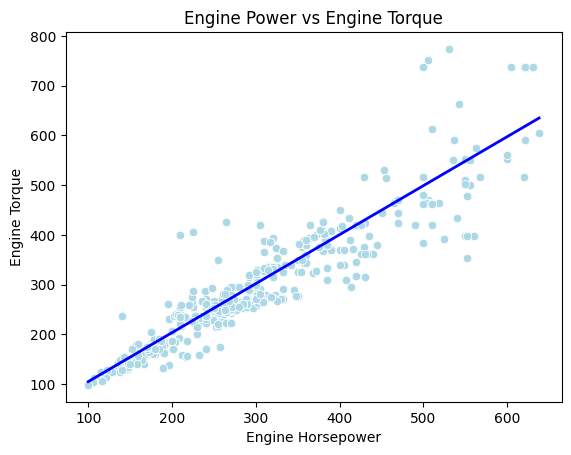

In [101]:

# Clean numeric data
y = pd.to_numeric(cars_df['Engine Information.Engine Statistics.Torque'])

# Fit 1st-degree polynomial
z=np.polyfit(x, y, 1)
p = np.poly1d(z)


# Create smooth line values
x_line = np.linspace(x.min(), x.max(), 200)
y_line = p(x_line)

#Plot scatterplot
sns.scatterplot(data=cars_df, x='Engine Information.Engine Statistics.Horsepower', y='Engine Information.Engine Statistics.Torque', color='lightblue')

# Plot best-fit line
plt.plot(x_line, y_line, color='blue', linewidth=2)

plt.title('Engine Power vs Engine Torque')
plt.xlabel('Engine Horsepower')
plt.ylabel('Engine Torque')
plt.show()

### 4. Subplots - 3 points

* Create a 2 x 2 subplots of the following plots. Make sure the entire plot is sufficiently large(Hint - check [`rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html) )
    * Box plot of highway fuel economiy(Note the extreme outlier. You may optionally remove it before plotting it. Both are acceptable solutions) - 0.5 points
    * Pie chart of Model year(`Identification.Year`) - 0.5 points
    * Histogram of Length(`Dimensions.Length`) with appropriate bins - 0.5 points
    * Scatter-plot of Length vs Width(`Dimensions.Width`) with marker size representing engine horsepower - 0.5 point
* Subplot and appropriate labelling - 1 point
* The order of the plots does not matter

In [ ]:
# YOUR CODE HERE


### 5. Heatmap - 3 points

* Create a heatmap of "Make of the car" vs "year+transmission type" for "number of models for that year"
    * Pick the top 8 car manufactutres (`Identification.Make`) by number of cars produced - x-axis
    * Use a combination of model year and transmission type on y-axis.
        * All entries with Automatic transmission should be renamed to "AT" and manual to "MT"
        * Each entry on the Y-axis should look like "2009-AT" representing the model year 2009 and Automatic transmission type
        * This will require some pre-processing with pandas before plotting the heatmap
    * Create a heatmap where each data point shows the number of such models created
    * The heatmap should be of size 8x8, with top 8 manufactutres on x-axis and 8 combinations(4 years and 2 transmission types) of year-transmission on y-axis

In [ ]:
# YOUR CODE HERE

### 6. Pair-plots (Seaborn) - 2 points
* Create a pair-plot of the following columns: length, width, highway fuel economy, city fuel economy, engine power, engine torque
* Which of the pairs show a positive correlation? Which of the pairs show a negative correlation?

In [ ]:
# YOUR CODE HERE